In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

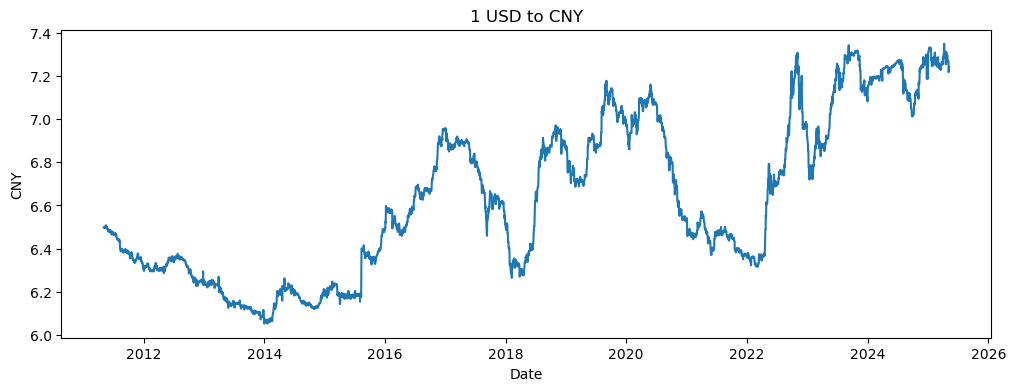

,Date,EUR,GBP,USD,DZD,AUD,BWP,BND,CAD,CLP,...,SOS,TZS,UGX,BDT,WST,MNT,VUV,BAM,VES,XCG
0,2011-05-04,0.671953,0.605310,1,71.293,0.923094,6.373486,1.2302,0.956164,463.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-05-05,0.674010,0.605797,1,71.727,0.932240,6.459948,1.2310,0.963066,463.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-05-06,0.688508,0.609307,1,71.912,0.935115,6.451613,1.2350,0.963483,468.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-05-07,0.688508,0.609307,1,71.912,0.935115,6.451613,1.2350,0.963483,468.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-05-08,0.688508,0.609307,1,71.912,0.935115,6.451613,1.2350,0.963483,468.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
base = "USD"
filename = f"{base}_exchange_rates.json"

# I had to look up how to get dictionary in the same format as the notes you have
# first function reads json and orient= 'index' swaps the rows and columns
# Second enmurates the rows instead of them being indexed by date
# the date column gets named index when it gets reset so I change it to date to make more sense when graphing
df = pd.read_json(filename, orient= 'index')
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})

plt.figure(figsize=(12, 4))
sns.lineplot(x='Date', y='CNY', data=df)
plt.title("1 USD to CNY")
plt.show()

df.head()





